In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
sns.set()

In [5]:
data=pd.read_csv("http://bit.ly/w-data")

In [6]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
data.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [49]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


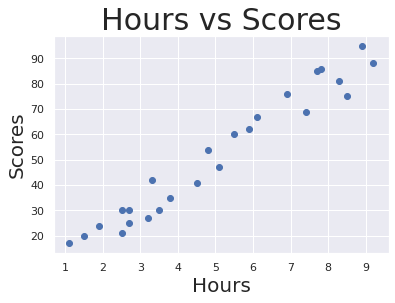

In [50]:
y = data['Scores']
x = data['Hours']
plt.scatter(x,y)
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.title('Hours vs Scores',fontsize=30)
plt.show()

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [57]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [58]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [59]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

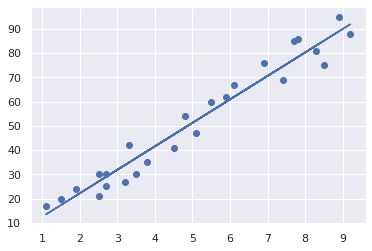

In [60]:
slope = reg.coef_
intercept = reg.intercept_
regline = slope*x + intercept
plt.scatter(x,y)
plt.plot(x,regline)
plt.show()

In [61]:
a = reg.score(x_train,y_train)*100
b = reg.score(x_test,y_test)*100

print("Training Accuracy = ",a)
print("Test Accuract = ",b)

Training Accuracy =  94.91209376364417
Test Accuract =  96.78055545167994


In [62]:
y_predicted = reg.predict(x_test)
df = pd.DataFrame({"y_Actual" : y_test, "y_Predicted" : y_predicted})
df

,y_Actual,y_Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [63]:
print("Mean Squared Error : ", metrics.mean_squared_error(y_test,y_predicted))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,y_predicted))
print("The R^2 value is : ",reg.score(x_test,y_test))

Mean Squared Error :  18.943211722315272
Mean Absolute Error :  3.9207511902099244
The R^2 value is :  0.9678055545167994


In [64]:
pred_score = reg.predict([[9.25]])
print("The predicted score for the student studying 9.25 hours/day will be" ,pred_score[0])

The predicted score for the student studying 9.25 hours/day will be 92.38611528261494
